In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier

In [2]:
wdata = pd.read_csv('F:/ids/winequality-red.csv')
X=wdata.iloc[:,:-1]
Y=wdata.iloc[:,11]

In [3]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wdata.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wdata.shape

(1599, 12)

In [6]:
print(wdata.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
wdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


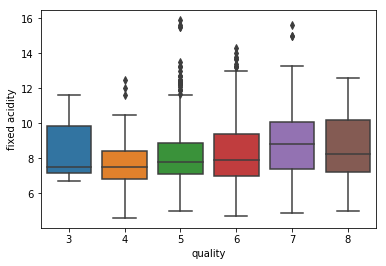

In [8]:
sns.boxplot('quality', 'fixed acidity', data = wdata)

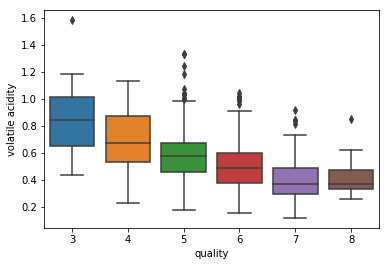

In [9]:
sns.boxplot('quality', 'volatile acidity', data = wdata)

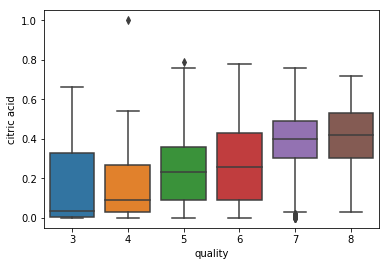

In [10]:
sns.boxplot('quality', 'citric acid', data = wdata)

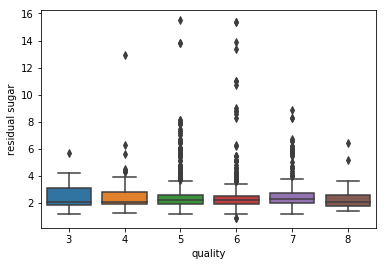

In [11]:
sns.boxplot('quality', 'residual sugar', data = wdata)


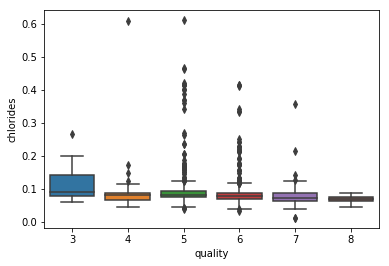

In [12]:
sns.boxplot('quality', 'chlorides', data = wdata)


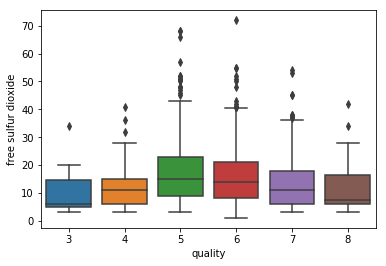

In [13]:
sns.boxplot('quality', 'free sulfur dioxide', data = wdata)


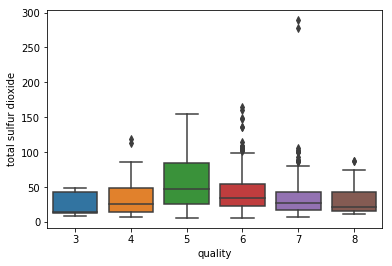

In [14]:
sns.boxplot('quality', 'total sulfur dioxide', data = wdata)


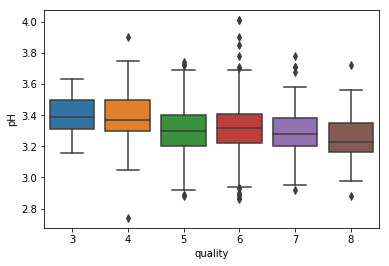

In [15]:
sns.boxplot('quality', 'pH', data = wdata)


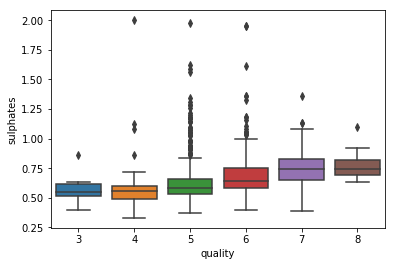

In [16]:
sns.boxplot('quality', 'sulphates', data = wdata)


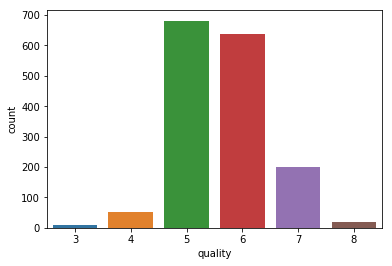

In [17]:
sns.countplot(wdata['quality'],label="Count")

In [18]:
wdata.quality = [1 if each >5.5 else 0 for each in wdata.quality]
wdata['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

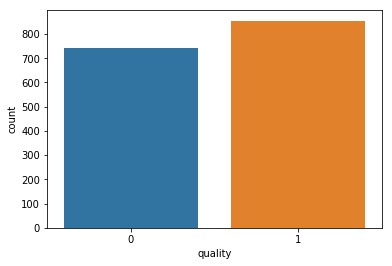

In [19]:
sns.countplot(wdata['quality'],label="Count")

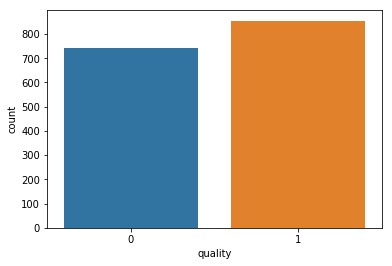

In [20]:
sns.countplot(wdata['quality'],label="Count")

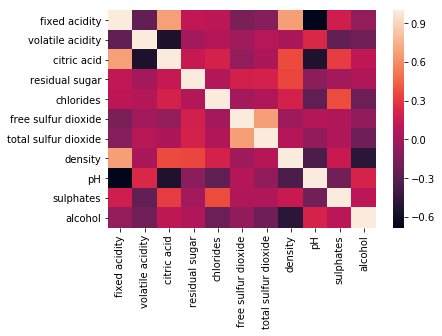

In [21]:
 df=pd.DataFrame(X)
df.corr(method='pearson')

corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [22]:
wdata.drop(['citric acid'],axis=1,inplace=True) 
wdata.drop(['density'],axis=1,inplace=True)
wdata.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,1.9,0.075,17.0,60.0,3.16,0.58,9.8,1
4,7.4,0.70,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0


In [23]:
wdata.shape

(1599, 10)

In [24]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 41)


In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [26]:
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix")
print(cm)
print('Accuracy Score :',accuracy_score(Y_test, Y_pred) * 100 ,"%")

Confusion Matrix
[[ 96  40]
 [ 42 142]]
Accuracy Score : 74.375 %


In [27]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix")
print(cm)
print('Accuracy Score :',accuracy_score(Y_test, Y_pred) * 100 ,"%")

Confusion Matrix
[[106  30]
 [ 55 129]]
Accuracy Score : 73.4375 %


In [28]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix")
print(cm)
print('Accuracy Score :',accuracy_score(Y_test, Y_pred) * 100 ,"%")

Confusion Matrix
[[102  34]
 [ 54 130]]
Accuracy Score : 72.5 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
